<a href="https://colab.research.google.com/github/Betson1/MachineLearning/blob/main/%D0%9F%D0%B5%D1%80%D0%B2%D0%B0%D1%8F_%D0%BB%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт необходимых библиотек


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # устанавливаем seaborn по умолчанию для отрисовки графиков

# Загрузка набора данных в датафрейм

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
auction = pd.read_csv('/content/drive/MyDrive/auction_verification.csv')

In [ ]:
auction.head()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
0,0,0,2,1,59,1,0,False,163.316667
1,0,0,2,1,59,2,0,False,200.860000
2,0,0,2,1,59,4,0,False,154.888889
3,0,0,2,1,59,6,0,False,108.640000
4,0,0,2,1,60,1,0,True,85.466667


# Вывод основной информации о датафрейме.
Работа со строками и столбцами

В таблице приведены данные, связанные с процессом аукциона, где участники (Bidder 1, 2, 3, 4) конкурируют за товары (Product), делая ставки, а система проверяет результаты. Можно предположить, какие значения могут быть в этих столбцах:

process.b1.capacity, process.b2.capacity, process.b3.capacity, process.b4.capacity (Capacity - количество лотов, которые может выиграть каждый участник):
Значения:
1, 2, 3, 4 и т. д. (например, участник может выиграть максимум 3 товара).


property.price (цена на текущий проверяемый товар):
Значения:
от 59 до 90 (цены могут варьироваться в зависимости от товара).

property.product (номер товара, который проверяется):
Значения:
1, 2, 3 и т.д. (номер товара в списке аукционных предметов).

property.winner (победитель текущего лота, если 0, значит цена проверяется без привязки к победителю):
Значения:
1, 2, 3, 4 (идентификатор победителя), либо 0, если только цена проверяется.

verification.result (результат проверки):
Значения:
0 (не подтверждено) или 1 (подтверждено), бинарная переменная.

verification.time (время, затраченное на проверку):
Значения:
Может быть в секундах или минутах, например, 10, 20, 45.

Эти данные можно использовать для анализа результатов аукциона, включая определение победителей и оценки стоимости времени на проверку ставок и товаров.

In [ ]:
display(auction)         #Вывод датафрейма

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
0,0,0,2,1,59,1,0,False,163.316667
1,0,0,2,1,59,2,0,False,200.860000
2,0,0,2,1,59,4,0,False,154.888889
3,0,0,2,1,59,6,0,False,108.640000
4,0,0,2,1,60,1,0,True,85.466667
...,...,...,...,...,...,...,...,...,...
2038,2,3,2,1,90,5,0,True,82.425000
2039,2,3,2,1,90,5,1,True,1316.983333
2040,2,3,2,1,90,5,2,False,9365.450000
2041,2,3,2,1,90,5,3,False,8474.025000


Попытаемся посмотреть на разбег значений при помощи выделения минимального и максимального значения столбцов

In [ ]:
#Цикл который для каждой колонки выводит максимальное и минимальное значение
for column in auction.columns:
  print(f'{column}: \n\tMin: {auction[column].min()}\n\tMax: {auction[column].max()}')

process.b1.capacity: 
	Min: 0
	Max: 2
process.b2.capacity: 
	Min: 0
	Max: 3
process.b3.capacity: 
	Min: 1
	Max: 2
process.b4.capacity: 
	Min: 0
	Max: 1
property.price: 
	Min: 59
	Max: 90
property.product: 
	Min: 1
	Max: 6
property.winner: 
	Min: 0
	Max: 4
verification.result: 
	Min: False
	Max: True
verification.time: 
	Min: 77.91666666666667
	Max: 44130.520833333336


Вывод основной информации посредством метода describe()

In [ ]:
auction.describe()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.time
count,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000
mean,1.000000,2.093979,1.883994,0.587861,71.473324,3.252080,0.455213,7336.944574
std,0.816696,0.811269,0.320310,0.492340,8.048740,1.804225,1.062828,10375.393650
min,0.000000,0.000000,1.000000,0.000000,59.000000,1.000000,0.000000,77.916667
25%,0.000000,1.000000,2.000000,0.000000,65.000000,2.000000,0.000000,546.818910
50%,1.000000,2.000000,2.000000,1.000000,70.000000,3.000000,0.000000,1316.983333
75%,2.000000,3.000000,2.000000,1.000000,78.000000,5.000000,0.000000,10876.638889
max,2.000000,3.000000,2.000000,1.000000,90.000000,6.000000,4.000000,44130.520833


Датафрей содержит исключительно числовые данные, поэтому вывести можно разве что частоту результатов для разных категорий.

In [ ]:
data = {
    'Product': list(range(1, 7)),
    '60': [0] * 6,
    '70': [0] * 6,
    '80': [0] * 6,
    '90': [0] * 6,
}

for product in range(1, 7):
    for i, price_range in enumerate([(51, 60), (61, 70), (71, 80), (81, 90)]):
        lower_bound, upper_bound = price_range
        count = auction[(auction['property.product'] == product) & (auction['property.price'] >= lower_bound) & (auction['property.price'] <= upper_bound)]['property.price'].count()
        data[f'{upper_bound}'][product - 1] = count

df = pd.DataFrame(data)
df = df.set_index('Product')
print(df)
print("Вывод частоты появления значений цены меньше указанной с шагом в 10")

         60   70   80   90
Product                   
1        42  218   80  108
2        40  180  237    0
3         0   78  162    0
4        42  246    0    0
5         0   28  138   84
6        78  120  162    0
Вывод частоты появления значений цены меньше указанной с шагом в 10


В задание необходимо вывести названия колонок и строк.

In [ ]:
print(auction.columns)

Index(['process.b1.capacity', 'process.b2.capacity', 'process.b3.capacity',
       'process.b4.capacity', 'property.price', 'property.product',
       'property.winner', 'verification.result', 'verification.time'],
      dtype='object')


Строки под необходимым номером. При этом индексация означает просто номер строки.

In [ ]:
auction.iloc[[1, 5, 10]]

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
1,0,0,2,1,59,2,0,False,200.86
5,0,0,2,1,60,1,3,True,82.00
10,0,0,2,1,60,4,0,True,80.25


# Нормализация данных

Так как категориальных данных в датафрейме не существует, то выполняется вместо замены данных нормализация.

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# # Создаем объект MinMaxScaler
# scaler = MinMaxScaler()

# # Нормализуем все столбцы DataFrame
# normalized_df = pd.DataFrame(scaler.fit_transform(auction), columns=auction.columns)

# # Выводим нормализованный DataFrame
# print(normalized_df)

# Визуализации

Визуализации для признаков (гистограмы,ящик с усами и круговые диаграммы)

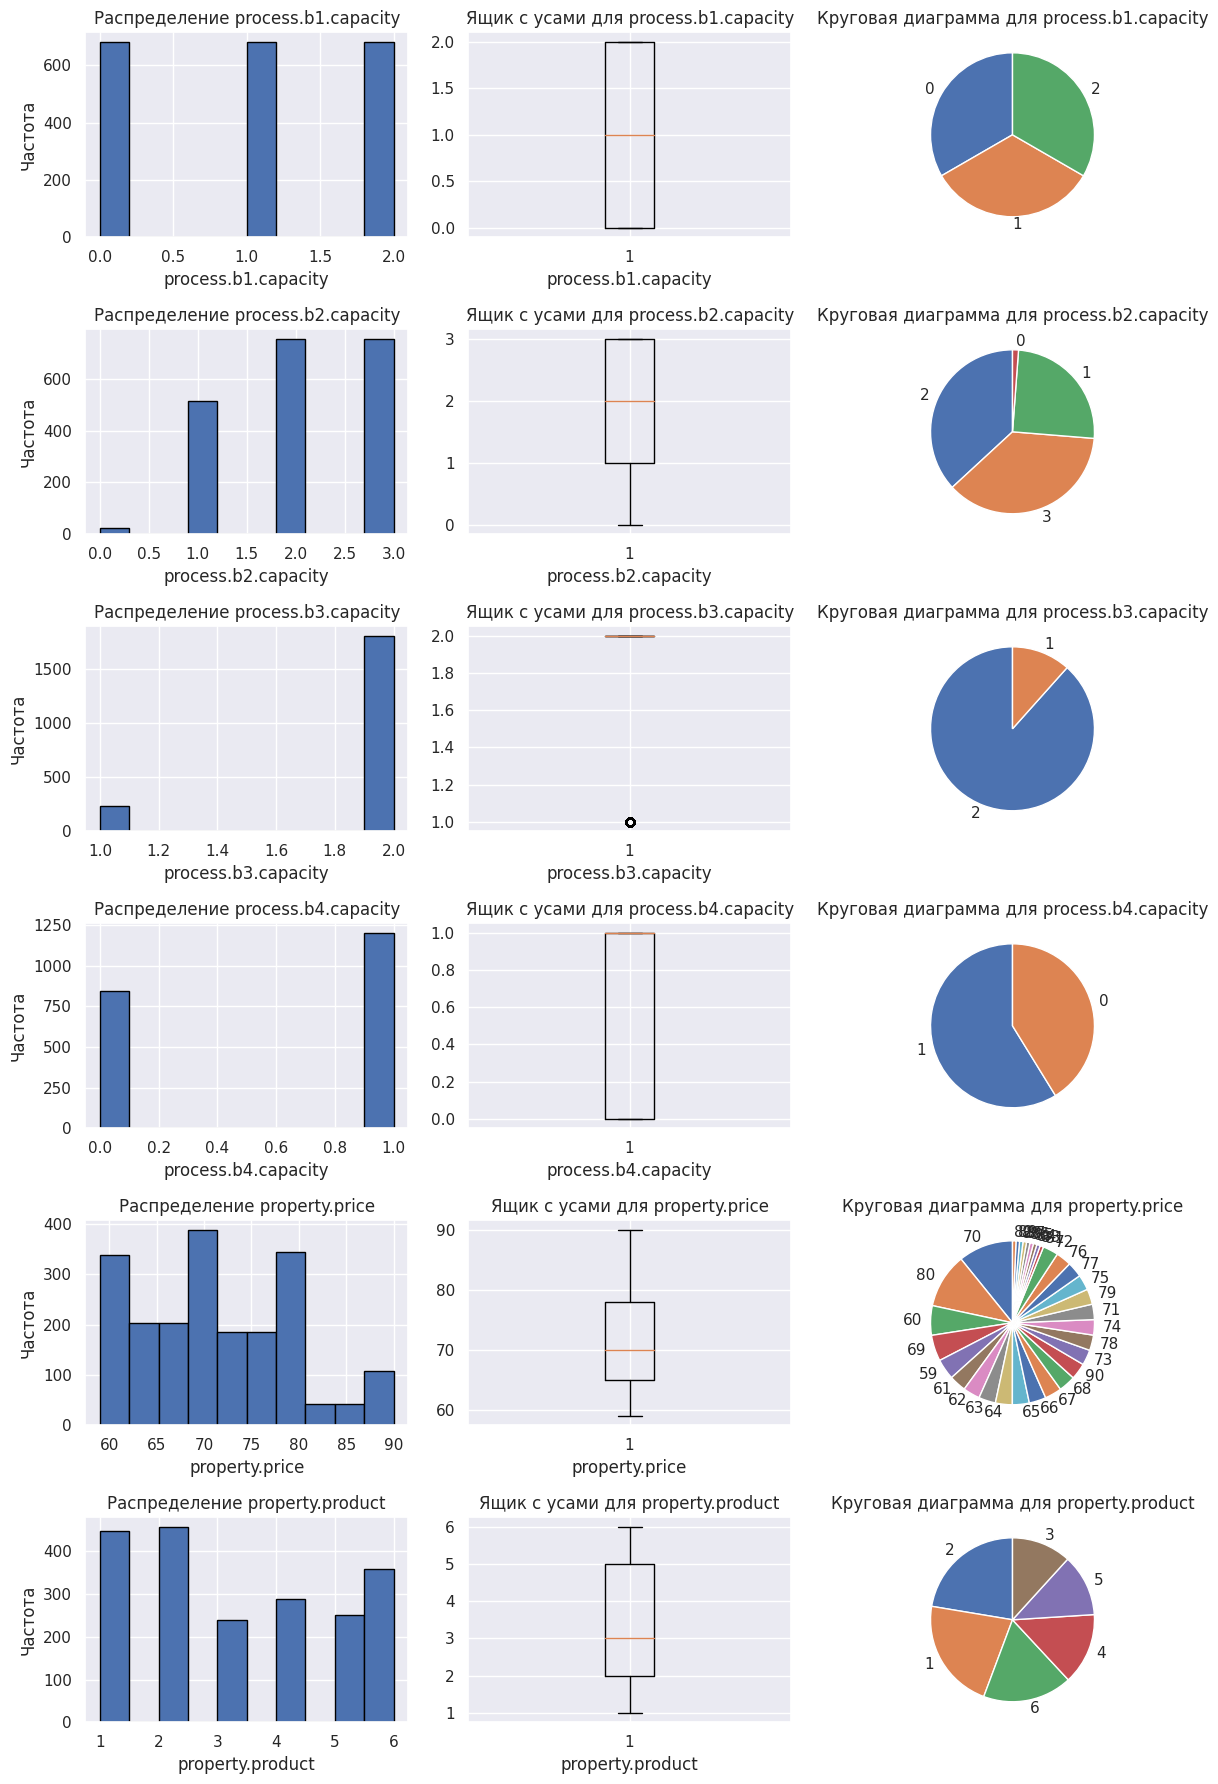

In [ ]:
# Создаем фигуру и оси для графиков
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(12, 18))

# Гистограммы
axes[0, 0].hist(auction['process.b1.capacity'], bins=10, edgecolor='black')
axes[0, 0].set_xlabel('process.b1.capacity')
axes[0, 0].set_ylabel('Частота')
axes[0, 0].set_title('Распределение process.b1.capacity')

axes[1, 0].hist(auction['process.b2.capacity'], bins=10, edgecolor='black')
axes[1, 0].set_xlabel('process.b2.capacity')
axes[1, 0].set_ylabel('Частота')
axes[1, 0].set_title('Распределение process.b2.capacity')

axes[2, 0].hist(auction['process.b3.capacity'], bins=10, edgecolor='black')
axes[2, 0].set_xlabel('process.b3.capacity')
axes[2, 0].set_ylabel('Частота')
axes[2, 0].set_title('Распределение process.b3.capacity')

axes[3, 0].hist(auction['process.b4.capacity'], bins=10, edgecolor='black')
axes[3, 0].set_xlabel('process.b4.capacity')
axes[3, 0].set_ylabel('Частота')
axes[3, 0].set_title('Распределение process.b4.capacity')

axes[4, 0].hist(auction['property.price'], bins=10, edgecolor='black')
axes[4, 0].set_xlabel('property.price')
axes[4, 0].set_ylabel('Частота')
axes[4, 0].set_title('Распределение property.price')

axes[5, 0].hist(auction['property.product'], bins=10, edgecolor='black')
axes[5, 0].set_xlabel('property.product')
axes[5, 0].set_ylabel('Частота')
axes[5, 0].set_title('Распределение property.product')

# Ящики с усами
axes[0, 1].boxplot(auction['process.b1.capacity'])
axes[0, 1].set_xlabel('process.b1.capacity')
axes[0, 1].set_title('Ящик с усами для process.b1.capacity')

axes[1, 1].boxplot(auction['process.b2.capacity'])
axes[1, 1].set_xlabel('process.b2.capacity')
axes[1, 1].set_title('Ящик с усами для process.b2.capacity')

axes[2, 1].boxplot(auction['process.b3.capacity'])
axes[2, 1].set_xlabel('process.b3.capacity')
axes[2, 1].set_title('Ящик с усами для process.b3.capacity')

axes[3, 1].boxplot(auction['process.b4.capacity'])
axes[3, 1].set_xlabel('process.b4.capacity')
axes[3, 1].set_title('Ящик с усами для process.b4.capacity')

axes[4, 1].boxplot(auction['property.price'])
axes[4, 1].set_xlabel('property.price')
axes[4, 1].set_title('Ящик с усами для property.price')

axes[5, 1].boxplot(auction['property.product'])
axes[5, 1].set_xlabel('property.product')
axes[5, 1].set_title('Ящик с усами для property.product')

# Круговые диаграммы
for i, col in enumerate(['process.b1.capacity', 'process.b2.capacity', 'process.b3.capacity',
                         'process.b4.capacity', 'property.price', 'property.product']):
    value_counts = auction[col].value_counts()
    axes[i, 2].pie(value_counts, labels=value_counts.index, startangle=90) # Убрали autopct
    axes[i, 2].set_title(f'Круговая диаграмма для {col}')

# Наpassen der Anordnung und Anzeigen der Grafiken
plt.tight_layout()
plt.show()

Визуализации для группы

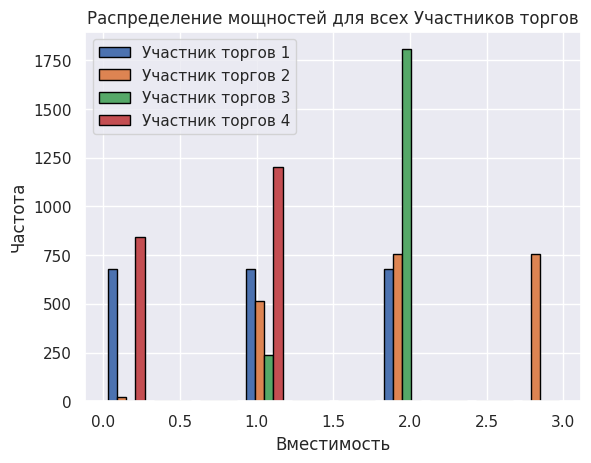

In [ ]:
#Визуализация распределения значений лотов, которые может выиграть каждый участник
plt.hist([auction['process.b1.capacity'], auction['process.b2.capacity'], auction['process.b3.capacity'], auction['process.b4.capacity']],
         bins=10,
         label=['Участник торгов 1', 'Участник торгов 2', 'Участник торгов 3', 'Участник торгов 4'],
         edgecolor='black')
plt.xlabel('Вместимость')
plt.ylabel('Частота')
plt.title('Распределение мощностей для всех Участников торгов')
plt.legend()
plt.show()

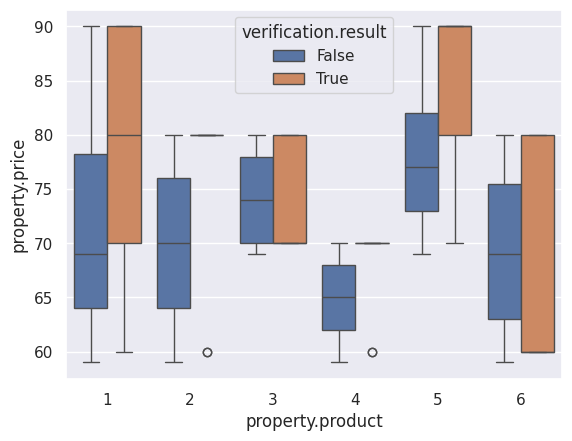

In [ ]:
import seaborn as sns

# Группировка по 'property.product' и 'verification.result'
# и визуализация средней цены с помощью boxplot
sns.boxplot(x='property.product', y='property.price', hue='verification.result', data=auction)
plt.show()

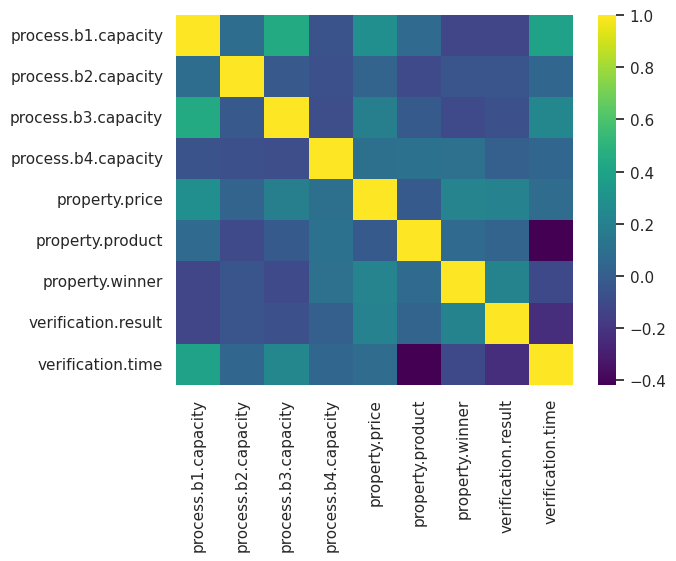

In [ ]:
# Вычисляем матрицу корреляции только для числовых столбцов
corr_matrix = auction.corr(numeric_only=True)
# Пример 2: Строим тепловую карту корреляции
sns.heatmap(corr_matrix, annot=False, cmap='viridis')
plt.show()

<Figure size 800x640 with 0 Axes>

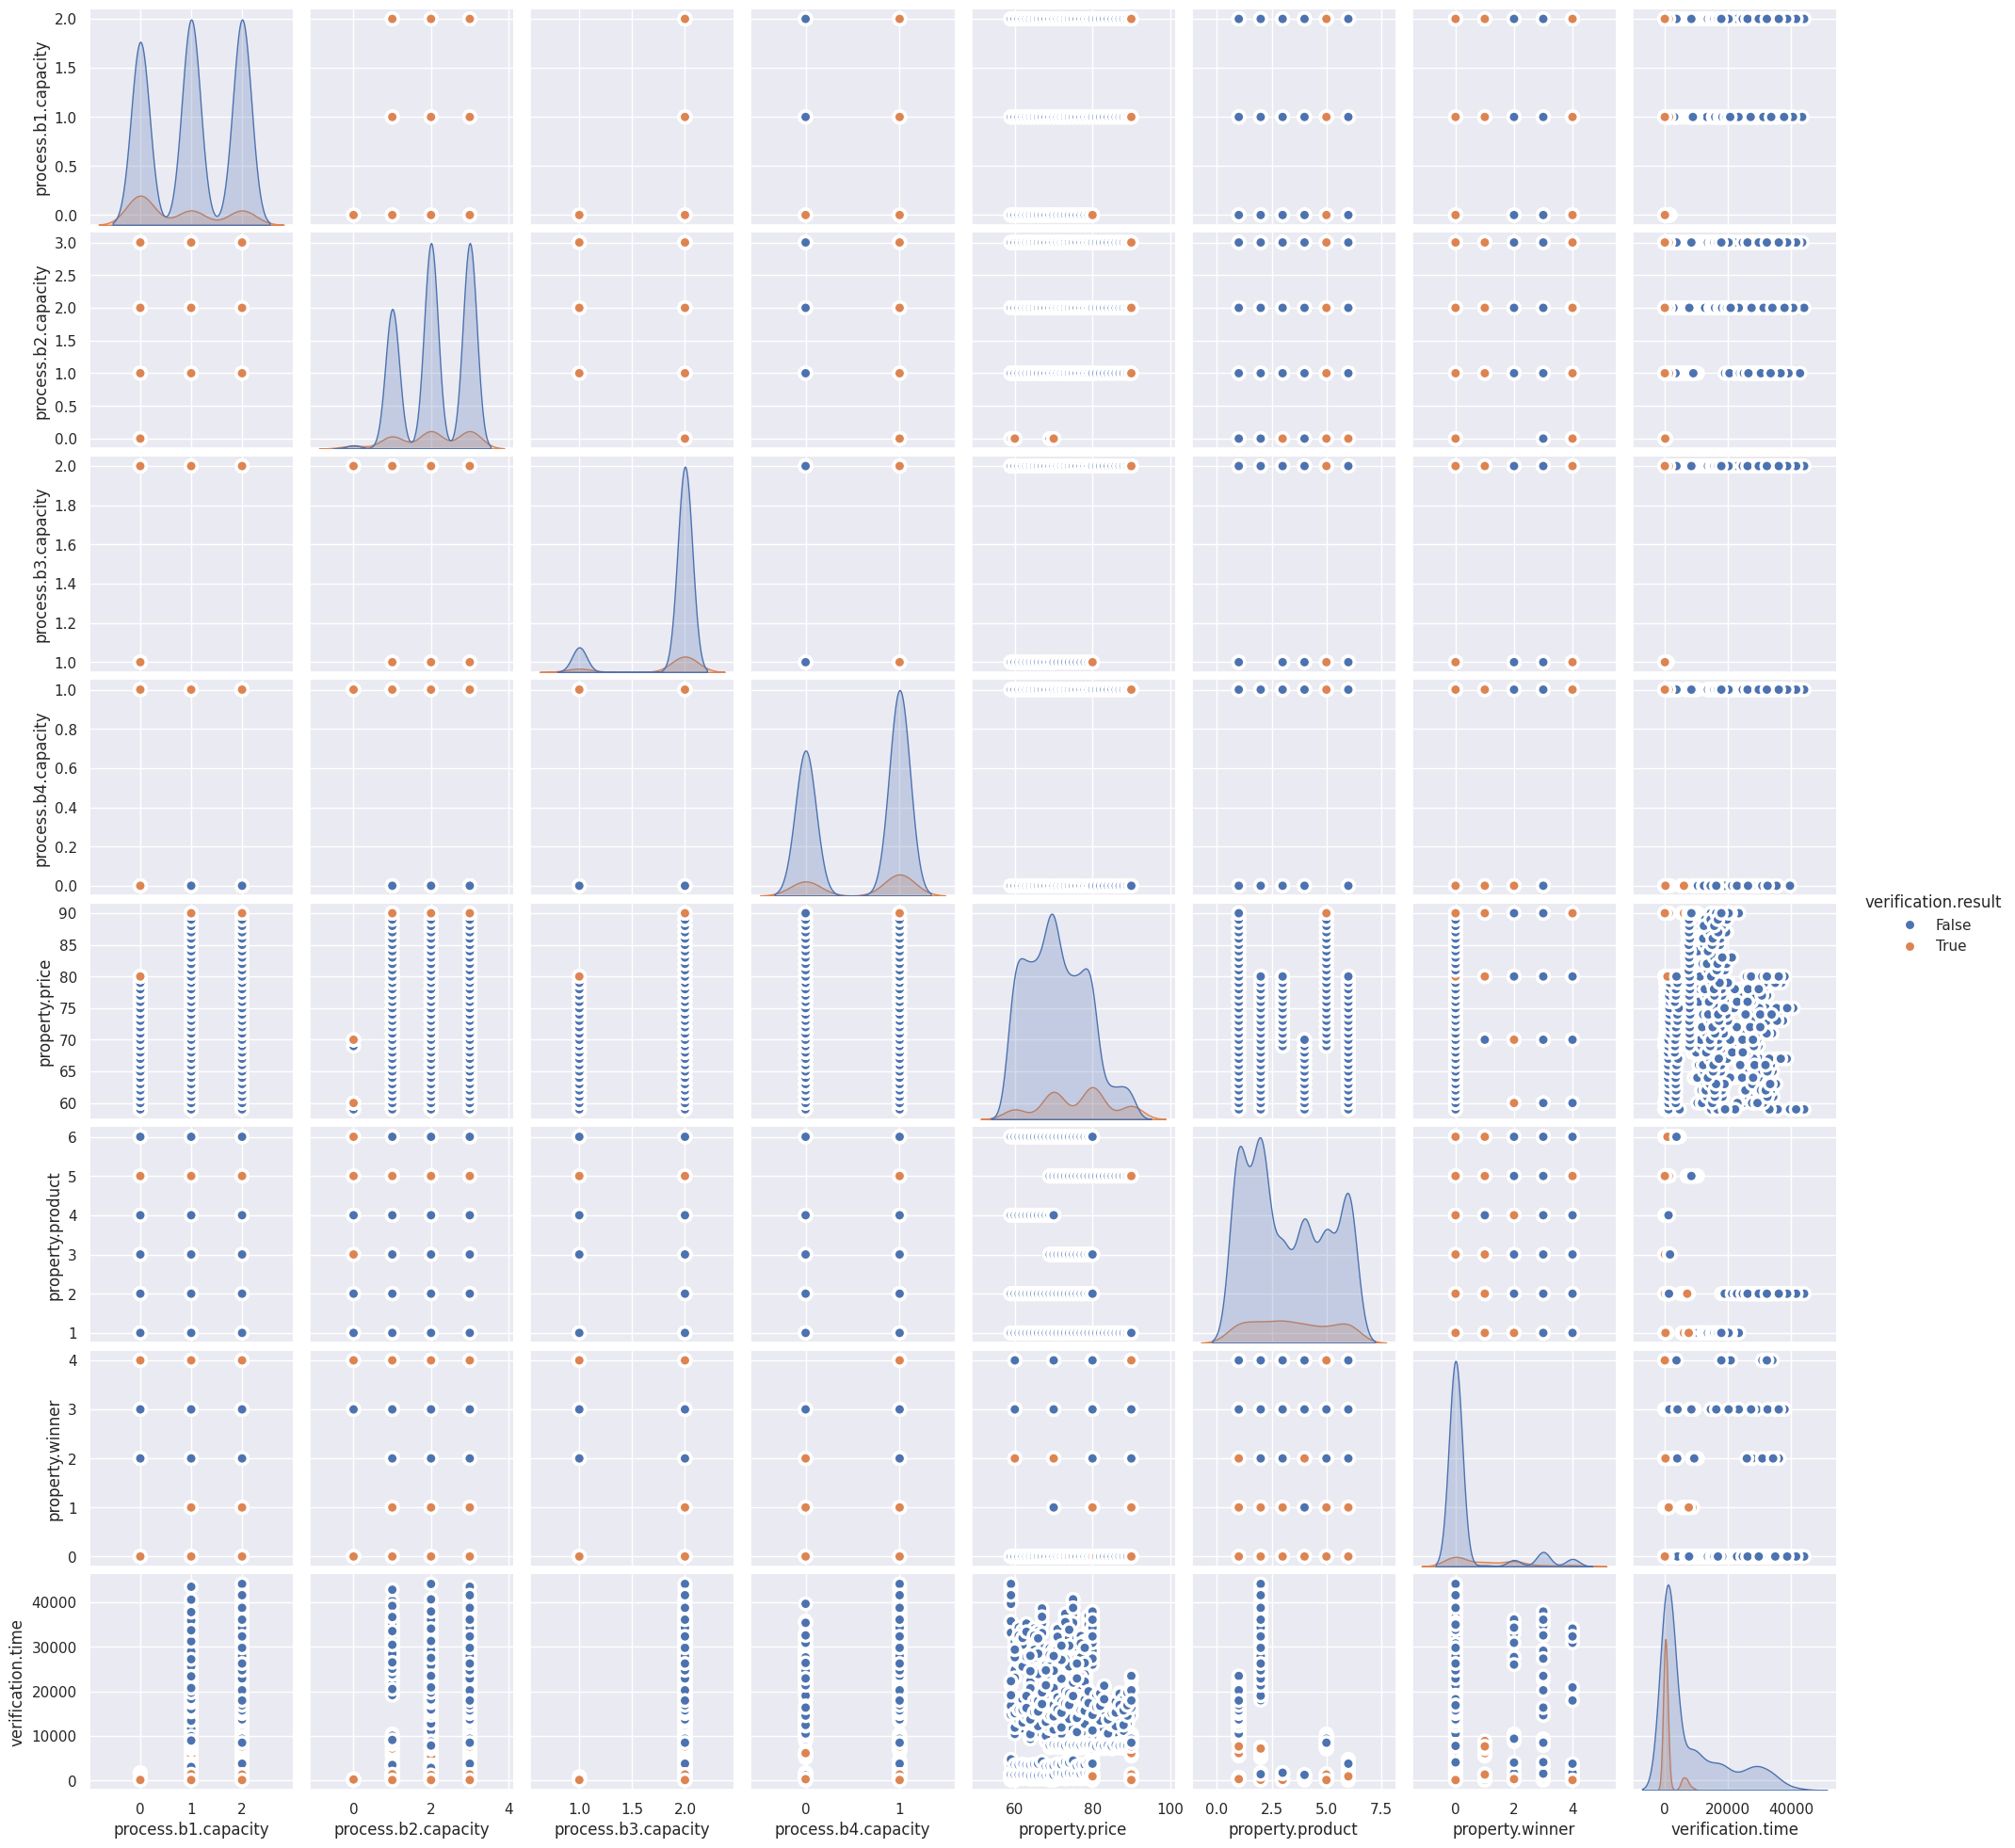

In [ ]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(auction, kind="scatter", hue="verification.result", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()